**CodeClause: Project 1**

**House Price Prediction: Simple Linear Regression**

**Import Libraries**

In [301]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

**Load and Explore Data**

In [152]:
df = pd.read_csv("Housing.csv")

**Display Rows Of Data**

In [155]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [157]:
df.shape

(545, 13)

**Summary Statistics**

In [160]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Name of the Columns**

In [165]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [167]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [169]:
df["price"].unique().sum()

1150235940

**Check for infinite values and replace them with NaN**

In [172]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

**Drop rows with NaN values**

In [175]:
df.dropna(subset=['price'], inplace=True)

**Style of the plots**

In [178]:
sns.set_style("whitegrid")

**Scatter plot of Price Vs Area**

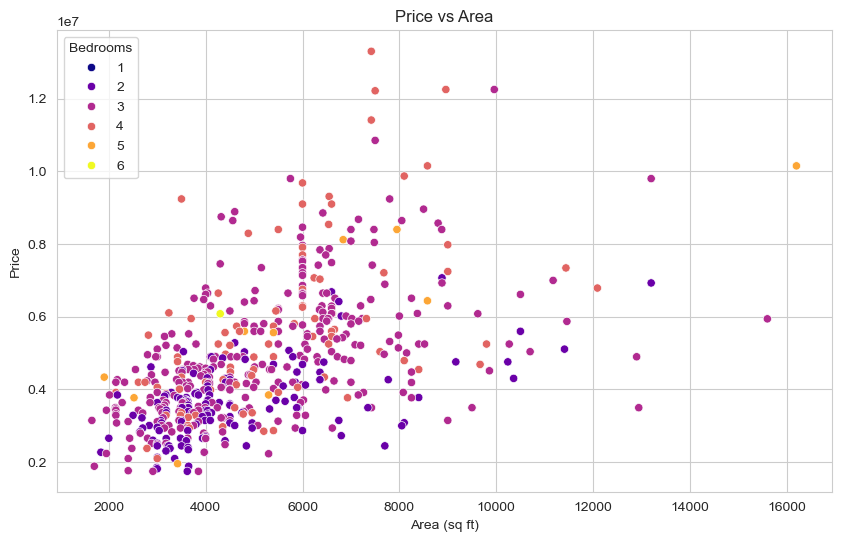

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='plasma')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

**Exploratory Data Analysis**

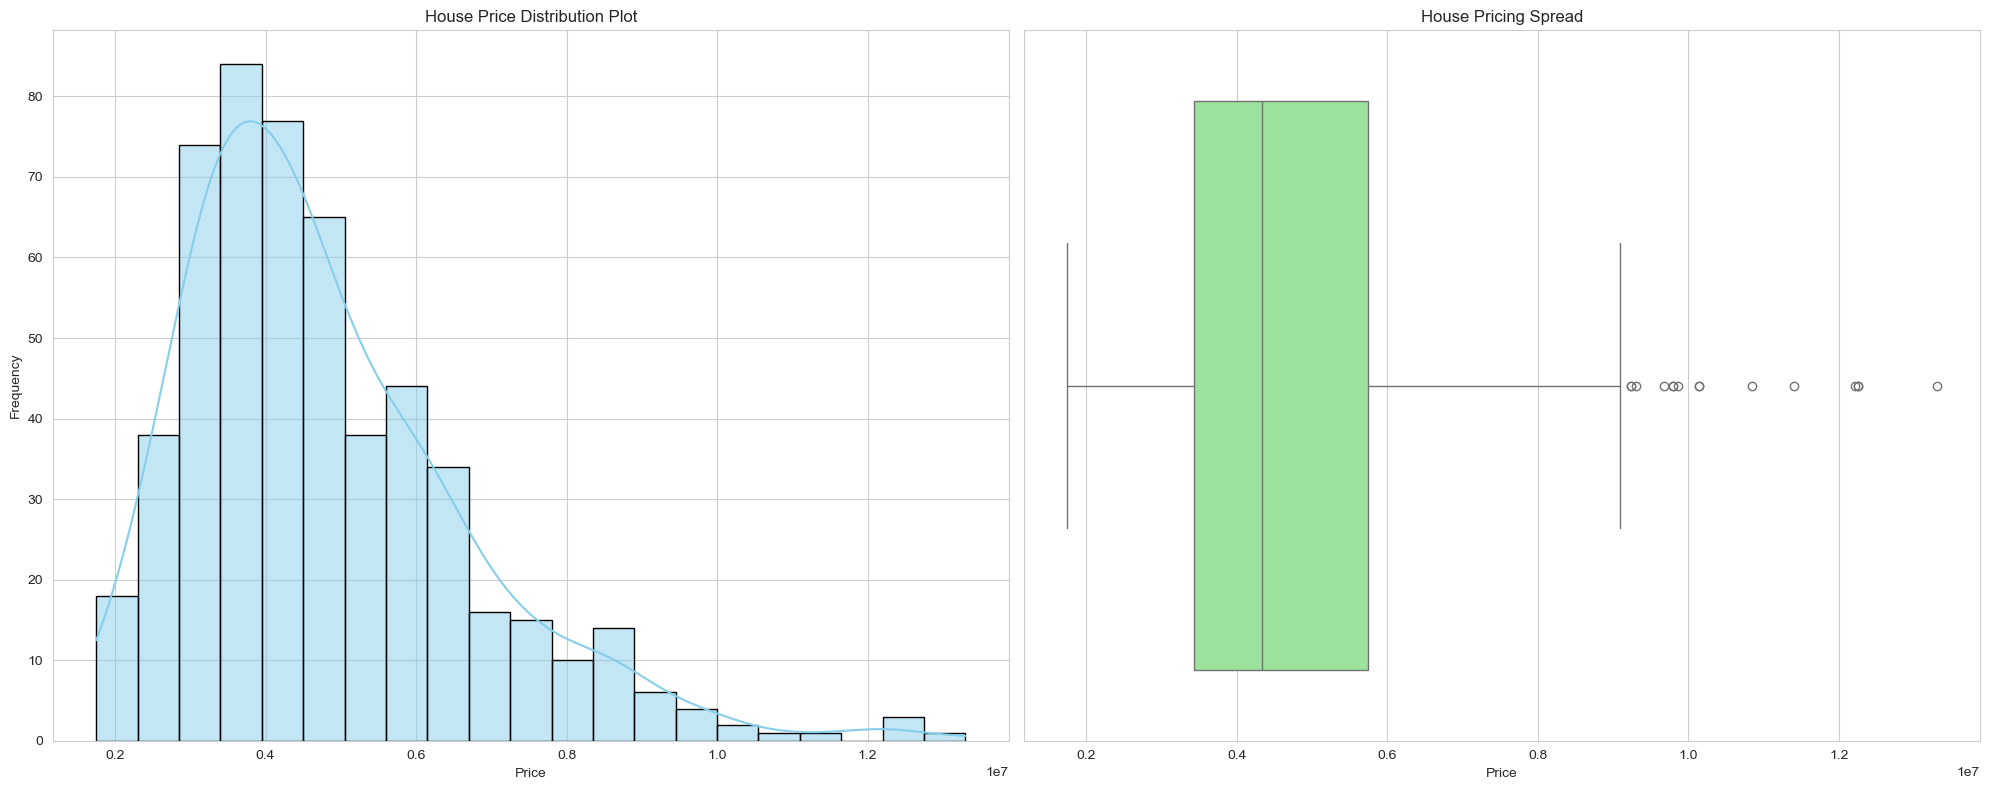

In [184]:
plt.figure(figsize=(20, 8))

# Left subplot: Distribution plot
plt.subplot(1, 2, 1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Right subplot: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df.price, color='lightgreen')
plt.title('House Pricing Spread')
plt.xlabel('Price')

plt.tight_layout()  # Ensures subplots are properly spaced
plt.show()

**Count Plot of Bedrooms**

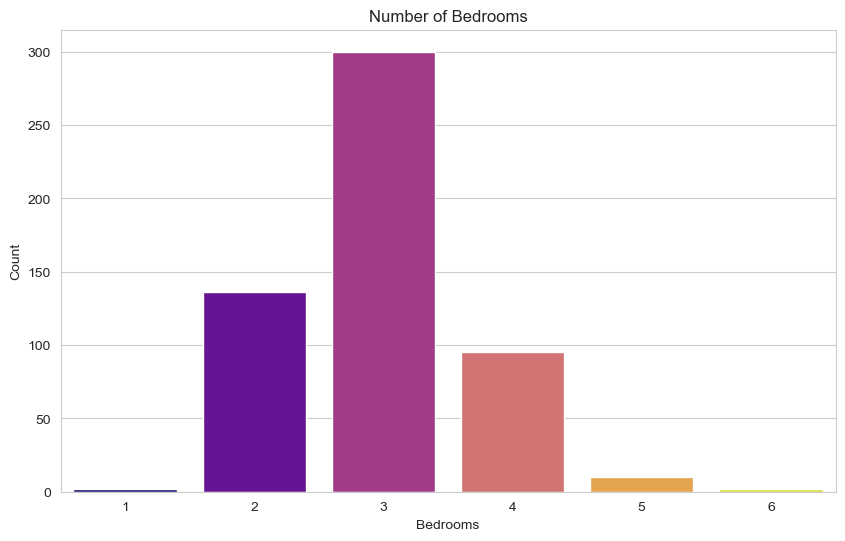

In [187]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, hue='bedrooms', palette='plasma', legend=False)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

**Count Plot of Bathrooms**

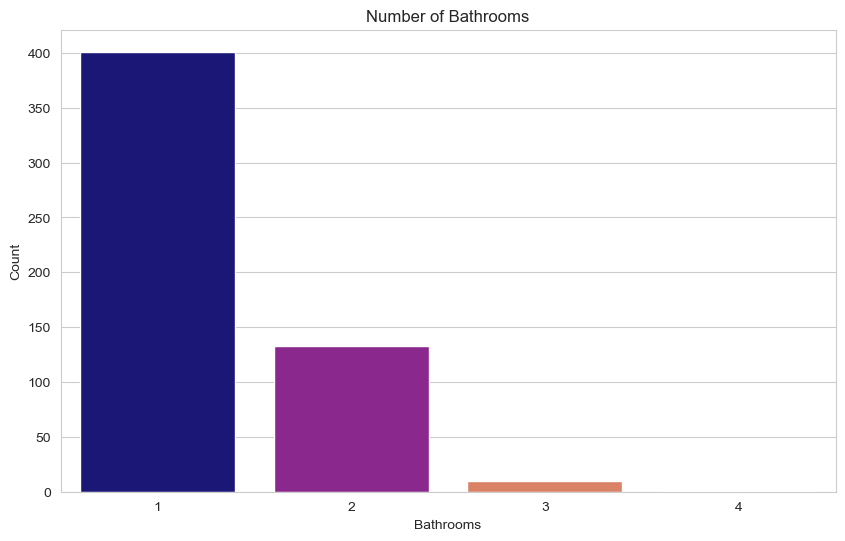

In [190]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, hue='bathrooms', palette='plasma', legend=False)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [198]:
# Encoding the object columns
for col in obj_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [204]:
# Assuming obj_cols is defined correctly
obj_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']
# Check if obj_cols are in df.columns
missing_cols = [col for col in obj_cols if col not in df.columns]
if missing_cols:
    print(f"Columns not found in DataFrame: {missing_cols}")
else:
    # Check for uniformity in object columns
    for col in obj_cols:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print()  # Print an empty line for separation


Value counts for mainroad:
mainroad
1    468
0     77
Name: count, dtype: int64

Value counts for guestroom:
guestroom
0    448
1     97
Name: count, dtype: int64

Value counts for basement:
basement
0    354
1    191
Name: count, dtype: int64

Value counts for hotwaterheating:
hotwaterheating
0    520
1     25
Name: count, dtype: int64

Value counts for airconditioning:
airconditioning
0    373
1    172
Name: count, dtype: int64

Value counts for prefarea:
prefarea
0    417
1    128
Name: count, dtype: int64

Value counts for furnishingstatus:
furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64



**Price Distribution Across Categories**

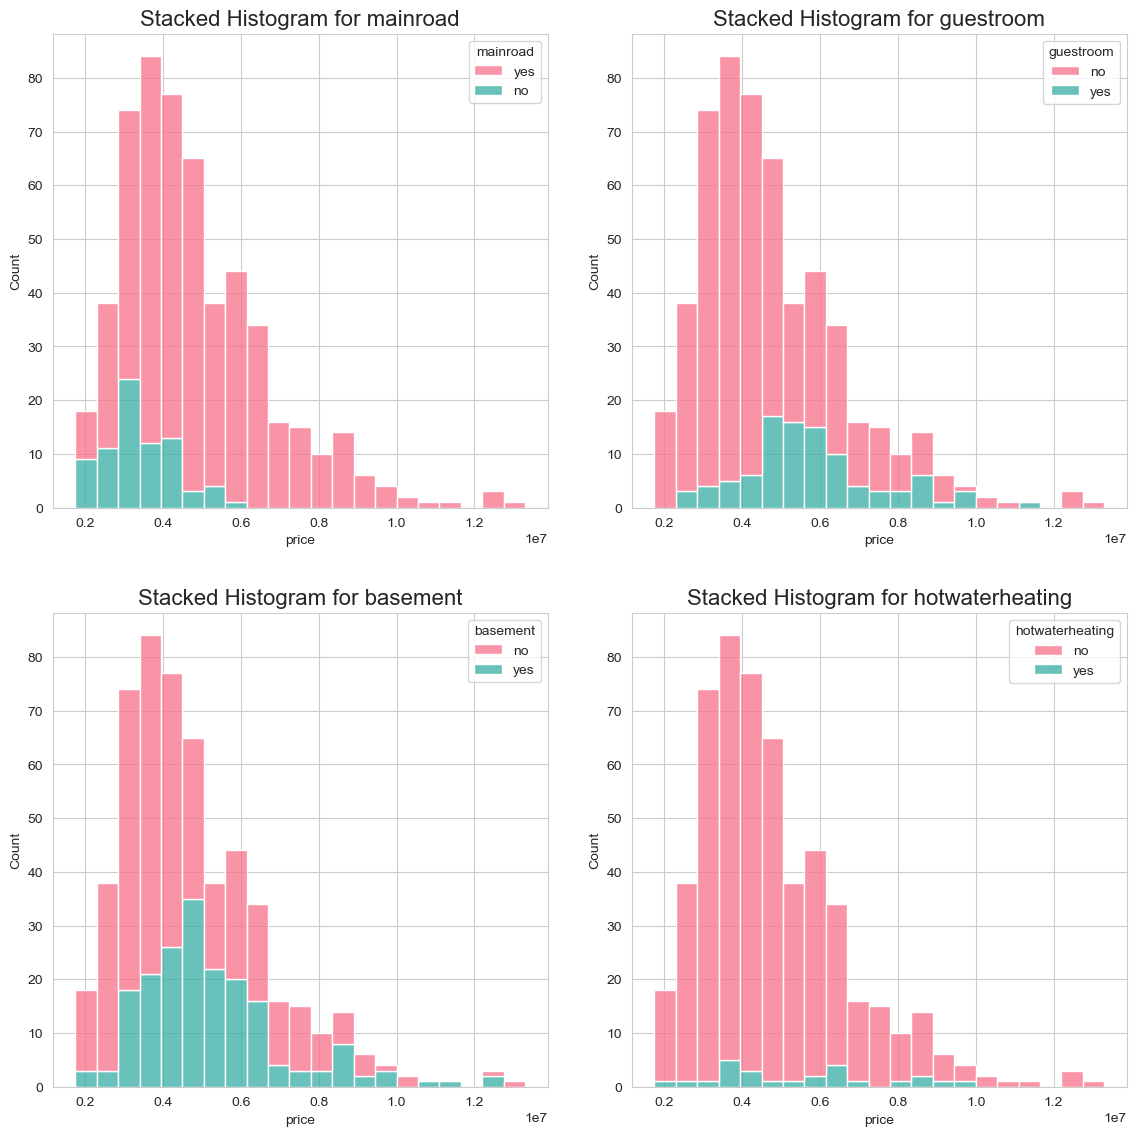

In [118]:
plt.figure(figsize=(12, 12))

# Create subplots
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.histplot(x='price', hue=obj_cols[i], data=df, multiple='stack', element='bars', palette='husl')

    # Set title for each subplot with increased font size
    plt.title(f'Stacked Histogram for {obj_cols[i]}', fontsize=16)

# Adjust layout
plt.tight_layout(pad=3.0)  # Increase padding between subplots if necessary
plt.show()


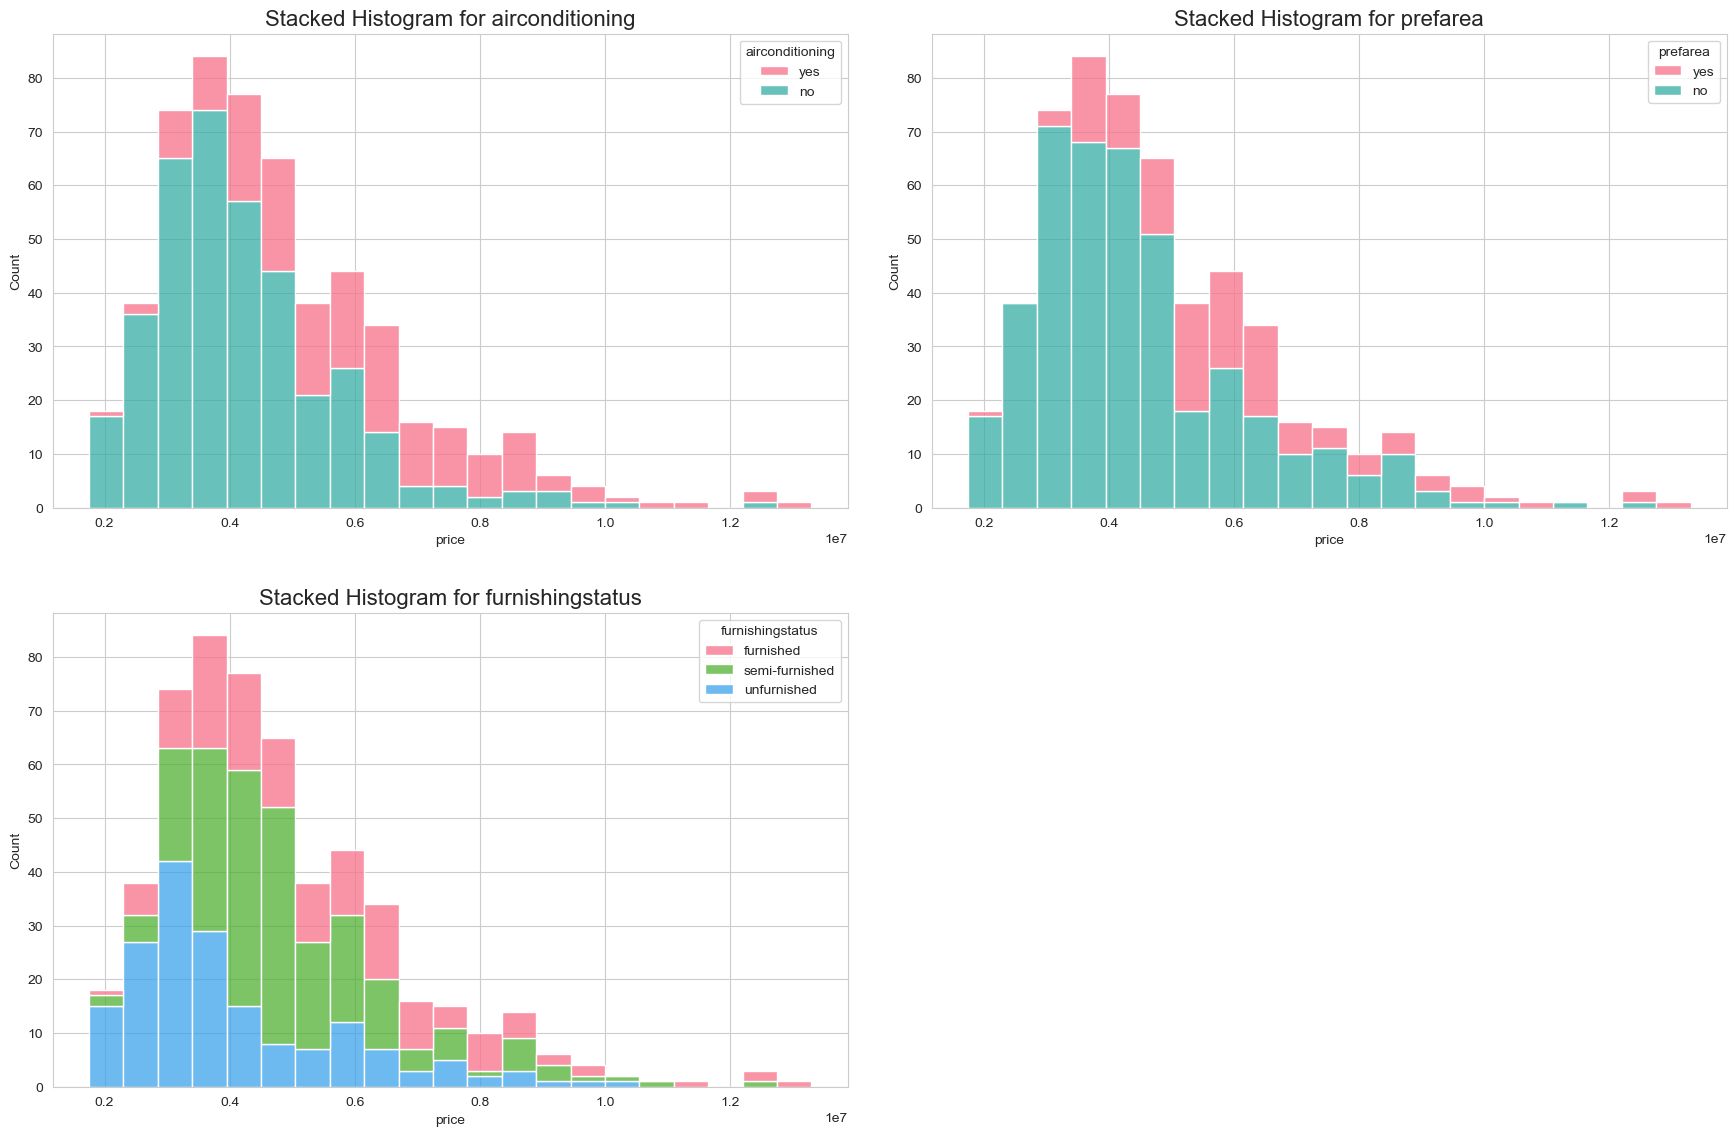

In [119]:
plt.figure(figsize=(18, 12))  # Adjusted figure size

# Create subplots for 2 rows and 2 columns, but plot only 3 charts
for i in range(3):
    plt.subplot(2, 2, i+1)
    sns.histplot(x='price', hue=obj_cols[i+4], data=df, multiple='stack', element='bars', palette='husl')

    # Set title for each subplot with increased font size
    plt.title(f'Stacked Histogram for {obj_cols[i+4]}', fontsize=16)

# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust padding if necessary
plt.show()


**Selecting relevant columns**

In [325]:
df = df[['price', 'area', 'bedrooms', 'bathrooms']]

**Creating Independent and Dependent Variables**

In [328]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [330]:
X.shape

(545, 3)

**Splitting the dataset into training and testing sets**

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Initializing the linear regression model**

In [336]:
lr = LinearRegression()

**Training the model**

In [339]:
# Scale the dataset
# Selecting only the relevant features for training the scaler
X_train_selected = X_train[['bedrooms', 'bathrooms', 'area']]
X_test_selected = X_test[['bedrooms', 'bathrooms', 'area']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_selected)

# Transform the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [341]:
# Save the scaler object
import pickle
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [343]:
# Initialize Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Evaluate the model
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f"Linear Regression Train Score: {train_score}")
print(f"Linear Regression Test Score: {test_score}")

Linear Regression Train Score: 0.49382504910035707
Linear Regression Test Score: 0.45592991188724474


In [345]:
# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
dt.fit(X_train, y_train)

# Evaluate the model
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(f"Decision Tree Regression Train Score: {train_score}")
print(f"Decision Tree Regression Test Score: {test_score}")

Decision Tree Regression Train Score: 0.914218912113133
Decision Tree Regression Test Score: 0.19113232541837544


In [347]:
# Initialize Lasso Regression model
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed

# Fit the model on the scaled training data
lasso.fit(X_train_scaled, y_train)  # Use scaled data

# Evaluate the model
train_score = lasso.score(X_train_scaled, y_train)
test_score = lasso.score(X_test_scaled, y_test)

print(f"Lasso Regression Train Score: {train_score}")
print(f"Lasso Regression Test Score: {test_score}")

Lasso Regression Train Score: 0.4938250491003505
Lasso Regression Test Score: 0.4559298944867277


In [349]:
# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0, random_state=42)  # Adjust alpha as needed

# Fit the model on the scaled training data
ridge.fit(X_train_scaled, y_train)  # Use scaled data

# Evaluate the model
train_score = ridge.score(X_train_scaled, y_train)
test_score = ridge.score(X_test_scaled, y_test)

print(f"Ridge Regression Train Score: {train_score}")
print(f"Ridge Regression Test Score: {test_score}")

Ridge Regression Train Score: 0.4938235706973265
Ridge Regression Test Score: 0.4556956717047672


**Make Predictions**

In [352]:
# Make predictions on training and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

**Evaluating the model**

In [355]:
models = [lr, dtr, lasso, ridge]  # List of trained models
mses = []  # List to store MSE values for each model
for model in models:
    # Make predictions on scaled test data
    pred = model.predict(X_test_scaled)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred)
    
    # Print MSE for the current model
    print(f'{type(model).__name__}: \t\t{mse:.4f}')
    
    # Store MSE in the list
    mses.append(mse)

LinearRegression: 		26723416528225.7617
DecisionTreeRegressor: 		5666819318807.3398
Lasso: 		2750040567261.1870
Ridge: 		2751224462765.9043


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [357]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [359]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1.7580214354271508e+19
R-Squared: -3478081.9026825097


In [361]:
np.min(mses)

2750040567261.187

In [363]:
# Save Linear Regression model
pickle.dump(lr, open('linreg.pkl', 'wb'))

In [365]:
X

,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1
...,...,...,...
540,3000,2,1
541,2400,3,1
542,3620,2,1
543,2910,3,1


In [369]:
# Input features for prediction
input_features = [[7420, 2, 1]]

# Transform the input features using the fitted scaler
scaled_input = scaler.transform(input_features)

# Make the prediction using the trained Linear Regression model
prediction = lr.predict(scaled_input)[0]

print(f"Predicted Price: {prediction:.2f}")

Predicted Price: 715458.74


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Visualization of Results**

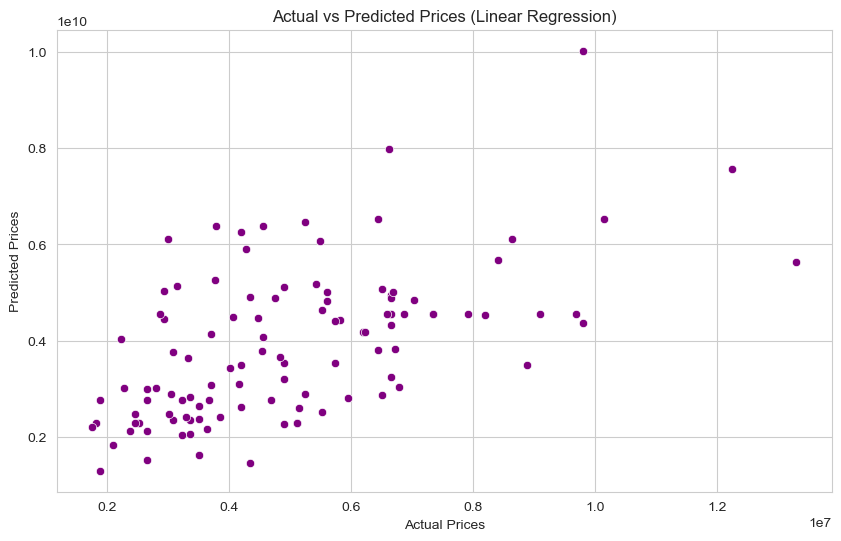

In [375]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()